# Task 2
This serves as a template which will guide you through the implementation of this task. It is advised to first read the whole template and get a sense of the overall structure of the code before trying to fill in any of the TODO gaps.
This is the jupyter notebook version of the template. For the python file version, please refer to the file `template_solution.py`.

First, we import necessary libraries:

In [537]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, RBF, Matern, RationalQuadratic, ExpSineSquared, WhiteKernel, ConstantKernel as C
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Add any other imports you need here

# Data Loading
TODO: Perform data preprocessing, imputation and extract X_train, y_train and X_test
(and potentially change initialization of variables to accomodate how you deal with non-numeric data)

C:\Users\jagoi\AppData\Local\Temp\ipykernel_21944\1988540556.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_CHF['season'] = label_encoder.transform(train_df_CHF['season'])


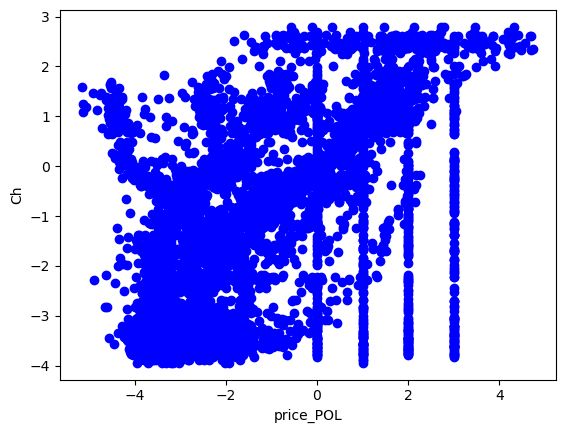

In [538]:
"""
This loads the training and test data, preprocesses it, removes the NaN
values and interpolates the missing data using imputation

Parameters
----------
Compute
----------
X_train: matrix of floats, training input with features
y_train: array of floats, training output with labels
X_test: matrix of floats: dim = (100, ?), test input with features
"""
# Load training data
train_df = pd.read_csv("train.csv")


# Load test data
test_df = pd.read_csv("test.csv")


# Dummy initialization of the X_train, X_test and y_train
# TODO: Depending on how you deal with the non-numeric data, you may want to
# modify/ignore the initialization of these variables
X_train = np.zeros_like(train_df.drop(['price_CHF'],axis=1))
y_train = np.zeros_like(train_df['price_CHF'])
X_test = np.zeros_like(test_df)

# TODO: Perform data preprocessing, imputation and extract X_train, y_train and X_test

# Drop all rows with nan entries in "price_CHF"
train_df_CHF = train_df.dropna(subset=['price_CHF'])

#Replace Seasons with numbers
label_encoder = LabelEncoder()
all_seasons = pd.concat([train_df_CHF['season'], test_df['season']])
label_encoder.fit(all_seasons)
train_df_CHF['season'] = label_encoder.transform(train_df_CHF['season'])
test_df['season'] = label_encoder.transform(test_df['season'])


X_train = train_df_CHF.drop(columns=['price_CHF'])
y_train = train_df_CHF['price_CHF']
X_test = test_df


#impute to replace all nans in X_train and X_test
imp_X = IterativeImputer(missing_values=np.nan)

imp_X.fit(X_train)
X_train = imp_X.transform(X_train)

imp_X.fit(X_test)
X_test = imp_X.transform(X_test)


labels = ["season", "price_AUS", "price_CHF", "price_CZE", "price_GER", "price_ESP", "price_FRA", "price_UK", "price_ITA", "price_POL", "price_SVK"]

for i in range(len(X_train[0,:])):
    x_val = X_train[:,i]
    y_val = X_train[:,2]


    plt.plot(x_val, y_val, 'bo')
    plt.xlabel(labels[i])
    plt.ylabel("Ch")
    #plt.show()

#print(X_train)

assert (X_train.shape[1] == X_test.shape[1]) and (X_train.shape[0] == y_train.shape[0]) and (X_test.shape[0] == 100), "Invalid data shape"

# Modeling and Prediction
TODO: Define the model and fit it using training data. Then, use test data to make predictions

In [539]:
"""
This defines the model, fits training data and then does the prediction
with the test data 

Parameters
----------
X_train: matrix of floats, training input with 10 features
y_train: array of floats, training output
X_test: matrix of floats: dim = (100, ?), test input with 10 features

Compute
----------
y_test: array of floats: dim = (100,), predictions on test set
"""
class Model(object):
    def __init__(self):
        super().__init__()
        self._x_train = None
        self._y_train = None
        self.gpr = GaussianProcessRegressor(kernel = Matern(nu=1.5), alpha=2)
        #self.gpr = GaussianProcessRegressor(kernel=RBF(length_scale=1.0))

    def train(self, X_train: np.ndarray, y_train: np.ndarray):
        #TODO: Define the model and fit it using (X_train, y_train)
        self.gpr.fit(X_train, y_train)

        self._x_train = X_train
        self._y_train = y_train

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        #TODO: Use the model to make predictions y_pred using test data X_test
        #y_pred = np.zeros(X_test.shape[0])
        y_pred = self.gpr.predict(X_test)

        assert y_pred.shape == (X_test.shape[0],), "Invalid data shape"
        return y_pred

In [540]:
model = Model()
# Use this function for training the model
model.train(X_train=X_train, y_train=y_train)
# Use this function for inferece
y_pred = model.predict(X_test)
print(y_pred)

[ 5.05969767  4.32291002  4.83413246  3.52376663  3.4382647   3.22396689
  2.34810401  2.01142025  1.9185763   0.43561323  0.88977421 -0.21122808
 -0.79855712 -1.34614776 -1.66775953 -1.54452742 -1.73574252 -2.27314279
 -2.02994161 -2.20762752 -1.98001533 -1.46273748 -1.66143354 -1.6022081
 -1.28175006 -1.15707556 -1.13581397 -1.45726701 -1.12812552 -1.16728386
 -1.110482   -1.24109972 -1.4513352  -1.24410333 -1.07911374 -1.46504027
 -1.60015396 -1.62999621 -1.69761999 -1.61310343 -1.82863073 -1.54424193
 -1.53399485 -1.53682486 -1.69310971 -1.59323929 -1.49995529 -1.47666216
 -1.30342756 -1.36494948 -1.23384184 -1.34987301 -1.48112634 -1.31226964
 -1.10331087 -1.28359128 -1.29063675 -1.2041876  -1.07201386 -1.28722716
 -1.17799889 -1.31963171 -1.0864672  -1.42338535 -1.12041861 -1.52643989
 -1.62227424 -1.78470935 -2.10580377 -2.34386713 -2.6765589  -3.14901276
 -3.81137712 -4.38738796 -4.02946478 -4.37283815 -4.23038916 -3.52492066
 -2.45570706 -1.61416956 -0.51120175  0.36919789  0.

# Saving Results
You don't have to change this

In [541]:
dt = pd.DataFrame(y_pred) 
dt.columns = ['price_CHF']
dt.to_csv('results.csv', index=False)
print("\nResults file successfully generated!")


Results file successfully generated!
